## **Configuración de entorno**

In [1]:
import matplotlib
from matplotlib.pyplot import figure

In [2]:
root = '/content/temp_drive'

In [3]:
from google.colab import drive
drive.mount(root, force_remount=True)

Mounted at /content/temp_drive


In [4]:
%cd "{root}/MyDrive/monografia_UDEA/Codigo"

/content/temp_drive/MyDrive/monografia_UDEA/Codigo


In [5]:
%run 00_configuracion_entorno.ipynb

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 36.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
/content/temp_drive/MyDrive/monografia_UDEA


**Análisis de la miníma fecha de cada móneda**

Se realiza con el objetivo de poder tomar una fecha de corte simmilar para todas las monedas y facilitar el analisis en la misma ventana de tiempo

In [6]:
print("Miníma Fecha del bitcoin", bitcoin.Date.min())
print("Miníma Fecha del binance", binance.Date.min())
print("Miníma Fecha del cardano", cardano.Date.min())
print("Miníma Fecha del ethereum", ethereum.Date.min())
print("Miníma Fecha del tether", tether.Date.min())

Miníma Fecha del bitcoin 2013-04-29 23:59:59
Miníma Fecha del binance 2017-07-26 23:59:59
Miníma Fecha del cardano 2017-10-02 23:59:59
Miníma Fecha del ethereum 2015-08-08 23:59:59
Miníma Fecha del tether 2015-02-26 23:59:59


In [7]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [8]:
bitcoin.Date.max()

'2021-07-06 23:59:59'

Se crea un dataframe vació con las columnas necesarias

In [9]:
df_Coins_open = df = pd.DataFrame(columns=['bitcoinOpen', 'binanceOpen', 'cardanoOpen','ethereumOpen','tetherOpen'])

Se inicializan los campos del nuevo dataframe con los valores correspondientes

In [10]:
df_Coins_open['bitcoinOpen'] = bitcoin.Open[bitcoin.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['binanceOpen'] = binance.Open[binance.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['cardanoOpen'] = cardano.Open[cardano.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['ethereumOpen'] = ethereum.Open[ethereum.Date >= '2017-10-02 23:59:59'].values
df_Coins_open['tetherOpen'] = tether.Open[tether.Date >= '2017-10-02 23:59:59'].values

#Se agrega la fecha 
df_Coins_open['Date'] = pd.to_datetime(cardano['Date']).values

Se formatean los datos como tipo date y se indexa la fecha

In [11]:
df_Coins_open['Date'] = df_Coins_open['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_Coins_open.set_index("Date", inplace=True)

In [12]:
df_Coins_open.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2017-10-02,4395.810059,1.52662,0.024607,302.481995,0.998088
2017-10-03,4408.459961,1.96783,0.025757,297.483002,1.001880
2017-10-04,4319.370117,1.85150,0.020864,292.753998,1.001910
2017-10-05,4229.879883,1.63499,0.021951,292.773010,1.000270
2017-10-06,4324.459961,1.67731,0.021359,295.154999,1.000420


Se toma la información relevante del dataframe que contiene los precios de apertura de cada moneda

In [13]:
df_Coins_open.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 2017-10-02 to 2021-07-06
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bitcoinOpen   1374 non-null   float64
 1   binanceOpen   1374 non-null   float64
 2   cardanoOpen   1374 non-null   float64
 3   ethereumOpen  1374 non-null   float64
 4   tetherOpen    1374 non-null   float64
dtypes: float64(5)
memory usage: 64.4+ KB


## **Visualización Series de Tiempo monedas**

Se apunta a la ruta de salidas para almacenar las imagenes resultantes

In [14]:
%cd "{root}/MyDrive/monografia_UDEA/Salidas"

/content/temp_drive/MyDrive/monografia_UDEA/Salidas


**Bitcoin**

In [15]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [16]:
bitcoin.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [17]:
bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


# Análisis de tendencia en escala logaritmica

## Grafica superpuesta de tendencia de las diferentes mónedas 

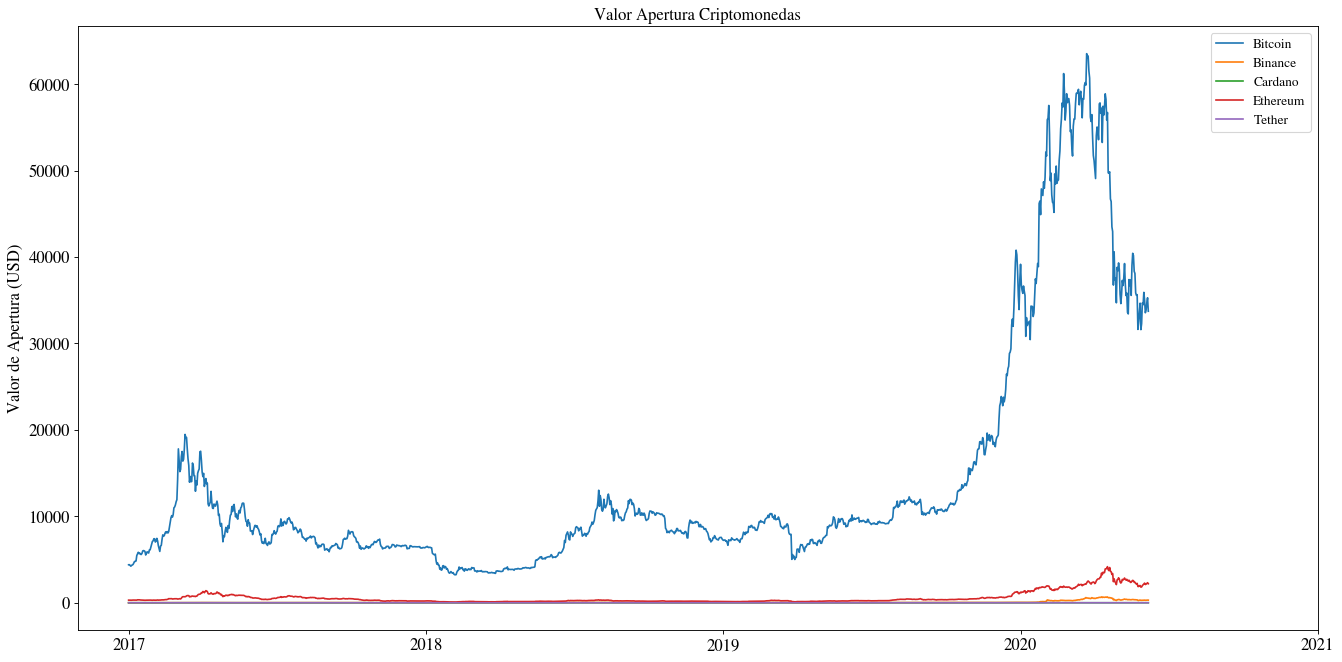

<Figure size 432x288 with 0 Axes>

In [18]:
figure(figsize=(20, 10), dpi=80)
bitcoinplt, = plt.plot(df_Coins_open.index,df_Coins_open.bitcoinOpen,label="Bitcoin")
binanceOpen, = plt.plot(df_Coins_open.index,df_Coins_open.binanceOpen,label="Binance")
cardanoOpen, = plt.plot(df_Coins_open.index,df_Coins_open.cardanoOpen,label="Cardano")
ethereumOpen, = plt.plot(df_Coins_open.index,df_Coins_open.ethereumOpen,label="Ethereum")
tetherOpen, = plt.plot(df_Coins_open.index,df_Coins_open.tetherOpen,label="Tether")
plt.title("Valor Apertura Criptomonedas", fontsize=15)
plt.xlabel("", fontsize=15)
plt.ylabel("Valor de Apertura (USD)", fontsize=15) 
plt.xticks(range(1,2000,400), ['2017','2018','2019','2020','2021'], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(handles=[bitcoinplt, binanceOpen, cardanoOpen,ethereumOpen,tetherOpen], fontsize=12)
plt.show()
plt.savefig("time-series-tendency-Log-AllCoins.jpg", bbox_inches='tight')

## Datos desde 2018 hasta 2021
Consolidación de datos desde 2018-2021 y conversión a escala logaritmica

In [19]:
df_Coins_open.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2017-10-02,4395.810059,1.52662,0.024607,302.481995,0.998088
2017-10-03,4408.459961,1.96783,0.025757,297.483002,1.001880
2017-10-04,4319.370117,1.85150,0.020864,292.753998,1.001910
2017-10-05,4229.879883,1.63499,0.021951,292.773010,1.000270
2017-10-06,4324.459961,1.67731,0.021359,295.154999,1.000420


In [20]:
df_Coins_open_copy = df_Coins_open.copy()
delete_df_idx=df_Coins_open_copy[df_Coins_open_copy.index<'2018-01-01'].index
df_Coins_open_copy=df_Coins_open_copy.drop(delete_df_idx)

In [21]:
for key in df_Coins_open_copy.columns:
  df_Coins_open_copy[key] = df_Coins_open_copy[key].apply(lambda x: np.log10(x))

In [22]:
df_Coins_open_copy.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen
Date,,,,,
2018-01-01,4.149595,0.935987,-0.143364,2.878382,0.005416
2018-01-02,4.134337,0.927252,-0.139856,2.887812,0.002486
2018-01-03,4.175460,0.943007,-0.108083,2.947434,0.002857
2018-01-04,4.183859,0.975241,0.039029,2.983045,0.005695
2018-01-05,4.189692,0.961216,0.068613,2.989339,0.000759


## Visualización tendencia 

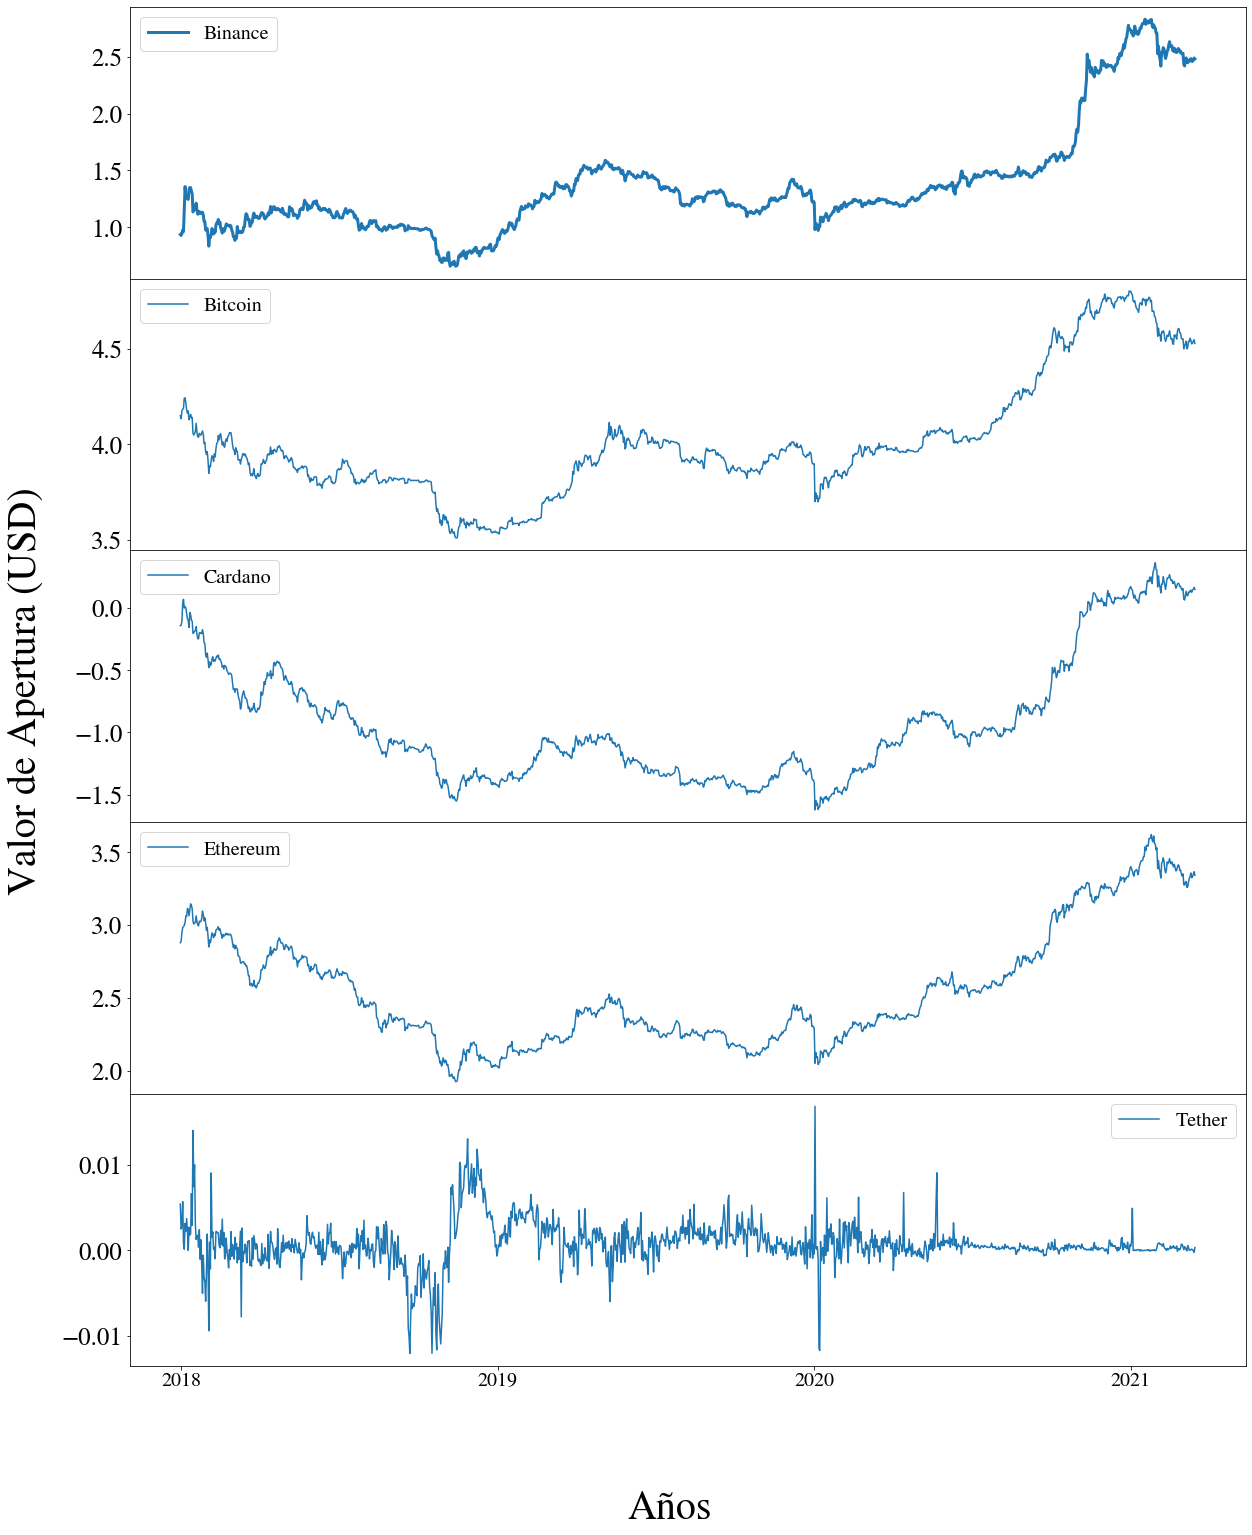

In [23]:
fig, ax = plt.subplots(5,1, figsize=(20,25), sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].plot(df_Coins_open_copy['binanceOpen'], lw=3, label="Binance") 
ax[0].legend(fontsize=20)
ax[0].tick_params(labelsize=25)

ax[1].plot(df_Coins_open_copy['bitcoinOpen'], label="Bitcoin") 
ax[1].legend(fontsize=20)
ax[1].tick_params(labelsize=25)

ax[2].plot(df_Coins_open_copy['cardanoOpen'], label="Cardano") 
ax[2].legend(fontsize=20)
ax[2].tick_params(labelsize=25)

ax[3].plot(df_Coins_open_copy['ethereumOpen'], label="Ethereum") 
ax[3].legend(fontsize=20)
ax[3].tick_params(labelsize=25)

ax[4].plot(df_Coins_open_copy['tetherOpen'], label="Tether") 
ax[4].legend(fontsize=20)
ax[4].tick_params(labelsize=25)

fig.text(0.5, 0.04, 'Años', ha='center',fontsize=40)
fig.text(0.04, 0.5, 'Valor de Apertura (USD)', va='center', rotation='vertical', fontsize=40)

plt.xticks(range(1,1600,400), ['2018','2019','2020','2021'], fontsize=20)

plt.savefig("time-series-tendency.jpg", bbox_inches='tight')
plt.show()


# **Toma de decisión Móneda bitcoin**

Se decide tomar como punto de referencia el bitcoin para nuestro análisis inicial, por su presencia en el mercado por más tiempo y se aplicarán las mismas estrategias en las demás monedas

**Visualización del Dataset**

In [24]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [25]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


Descripción del dataset del bitcoin

In [26]:
bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Se verifica que no existan datos nulos ##Revisar como visualizar bien que no hayan nulos

In [27]:
bitcoin.isna() == True 

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2986,False,False,False,False,False,False,False,False,False,False
2987,False,False,False,False,False,False,False,False,False,False
2988,False,False,False,False,False,False,False,False,False,False
2989,False,False,False,False,False,False,False,False,False,False


**Selección de la característica de Open e indexación**

In [28]:
bitcoinOpen_Date = bitcoin[["Date","Open"]]
bitcoinOpen_Date.head()

,Date,Open
0,2013-04-29 23:59:59,134.444000
1,2013-04-30 23:59:59,144.000000
2,2013-05-01 23:59:59,139.000000
3,2013-05-02 23:59:59,116.379997
4,2013-05-03 23:59:59,106.250000


Se le da formato a la fecha, especificando que es d/m/a 

In [29]:
bitcoinOpen = bitcoinOpen_Date.copy()
bitcoinOpen['Date'] = pd.to_datetime(bitcoinOpen['Date']).values
bitcoinOpen['Date'] = bitcoinOpen['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
bitcoinOpen.Date = pd.to_datetime(bitcoinOpen.Date, dayfirst = True)

se indexa la fecha

In [30]:
bitcoinOpen.set_index("Date", inplace=True)

Se hace una análisis estadístico sobre la serie de tiempo

In [31]:
bitcoinOpen.describe()

,Open
count,2991.000000
mean,6700.146240
std,11288.043736
min,68.504997
25%,430.445496
50%,2269.889893
75%,8569.656494
max,63523.754869


visualización del Dataframe

In [32]:
bitcoinOpen.head()

,Open
Date,
2013-04-29,134.444000
2013-04-30,144.000000
2013-05-01,139.000000
2013-05-02,116.379997
2013-05-03,106.250000


## **Evaluación de las caracterísiticas principales de la serie de tiempo**

**Estacionalidad**: Para este caso usaremos una prueba de hipotesis que nos permita definir si el valor de apertura de la moneda de bitcoin es estacionaria.
- Ho: La serie de tiempo no es estacionaria
- H1: La serie de tiempo es estacionaria

Para esta caso tomaremos el nivel de significancia del 5%

In [33]:
sts.adfuller(bitcoinOpen.Open)

(-0.8946791023847258,
 0.7897196148742021,
 29,
 2961,
 {'1%': -3.4325603944919445,
  '10%': -2.567289874591689,
  '5%': -2.8625166073924957},
 45927.95226962559)

- valor estadístico de contraste: -0.89467
- p-value: 0.78

Dados los resultados podemos concluir que aceptamos la hipotesis nula, ya que el valor estadistico, toma un valor superiores al dado en el nivel de significancia, que corresponde a -2.567289874591689; adicionalmente, para el p-value este es un valor superior al nivel de significancia. Por lo tanto los datos no tienen un comportamiento estacionario.




**Estacionariedad**:

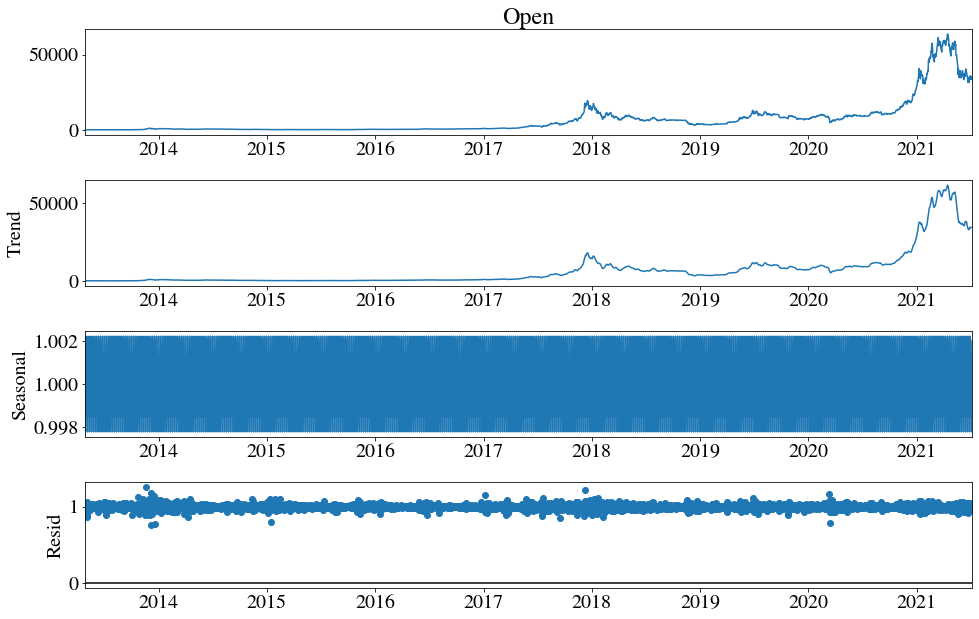

<Figure size 1008x648 with 0 Axes>

In [57]:
plt.rcParams['figure.figsize'] = (14, 9)

s_dec_additive = seasonal_decompose(bitcoinOpen.Open, model = "multiplicative")
s_dec_additive.plot()
plt.show()
plt.savefig("seasonal_decompose_bitcoint.jpg", bbox_inches='tight')


Dada la naturaleza del movimiento del precio del bitcoin, tampoco se observa una tendencia ciclíca en su comportamiento. Se aplicará la función logarimica a los datos, debido la naturaleza de los mismos, esto con el fin de suavizar la curva y poder evidenciar los datos que tienen un valor más pequeño con relación a los más grandes

In [35]:
bitcoinOpen_log10 = bitcoinOpen.apply(lambda x: np.log10(x))

Luego de aplicar el logatimo natural en base 10, se observa que el comportamieno de los datos si podría tener una tendencia, ya qué por medio de la grafica *Residual* se notan unos picos que están al rededor del inicio del año, y estos picos con relación a la grafica de tendencia, nos muestra leves varciaciones en la subida o bajada del precio.

Se aplica la media móvil y la desviación estándar para validar el comportamiento de las tendencias

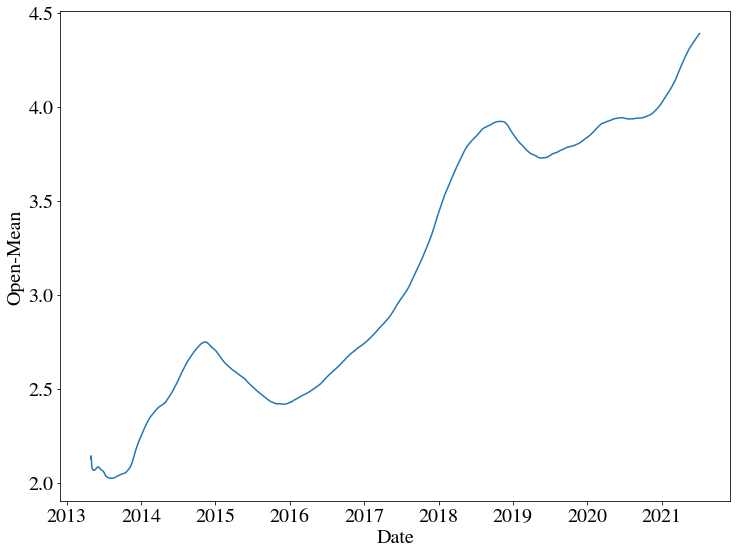

In [58]:
bitcoinOpen_mean = bitcoinOpen_log10.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinOpen_mean.index,bitcoinOpen_mean.values)
plt.xlabel('Date')
plt.ylabel('Open-Mean')
plt.show()

## Desviación Estándar

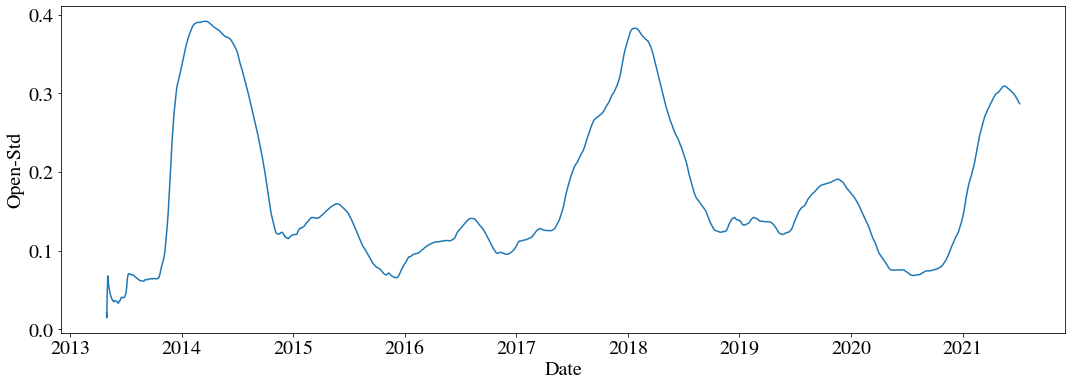

In [59]:
bitcoinOpen_std = bitcoinOpen_log10.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(18,6))
plt.plot(bitcoinOpen_std.index,bitcoinOpen_std.values)
plt.xlabel('Date')
plt.ylabel('Open-Std')
plt.show()

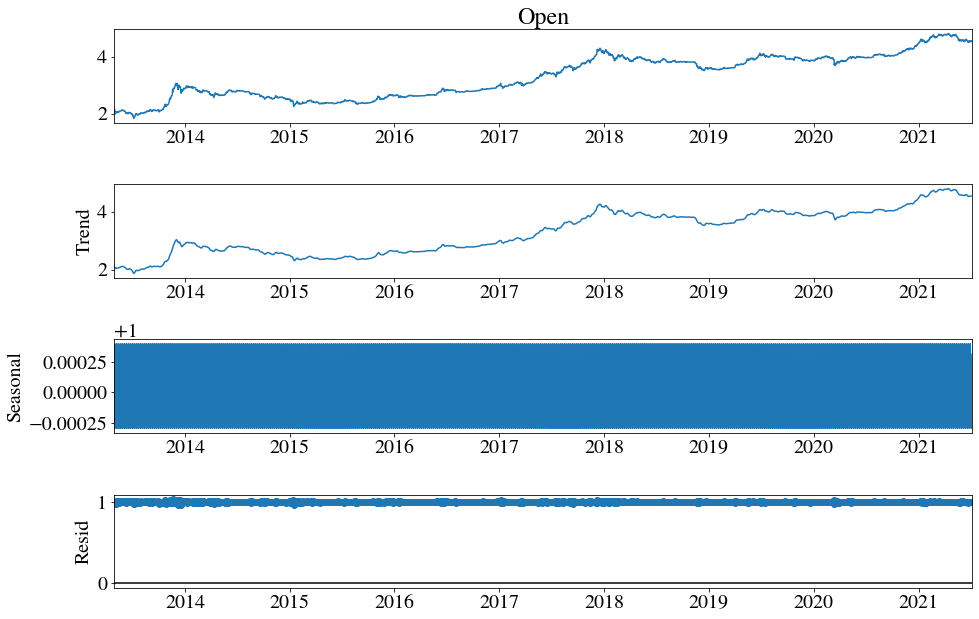

<Figure size 1008x648 with 0 Axes>

In [60]:
plt.rcParams['figure.figsize'] = (14, 9)

s_dec_additive = seasonal_decompose(bitcoinOpen_log10.Open, model = "multiplicative")
s_dec_additive.plot()
plt.show()
plt.savefig("seasonal_decompose_Log10_bitcoint.jpg", bbox_inches='tight')

adicionalmente se hace un diferencial para comparar los datos actuales con un año atrás.

In [37]:
bitcoinLog10_diff = bitcoinOpen_log10.Open.diff(365).dropna()

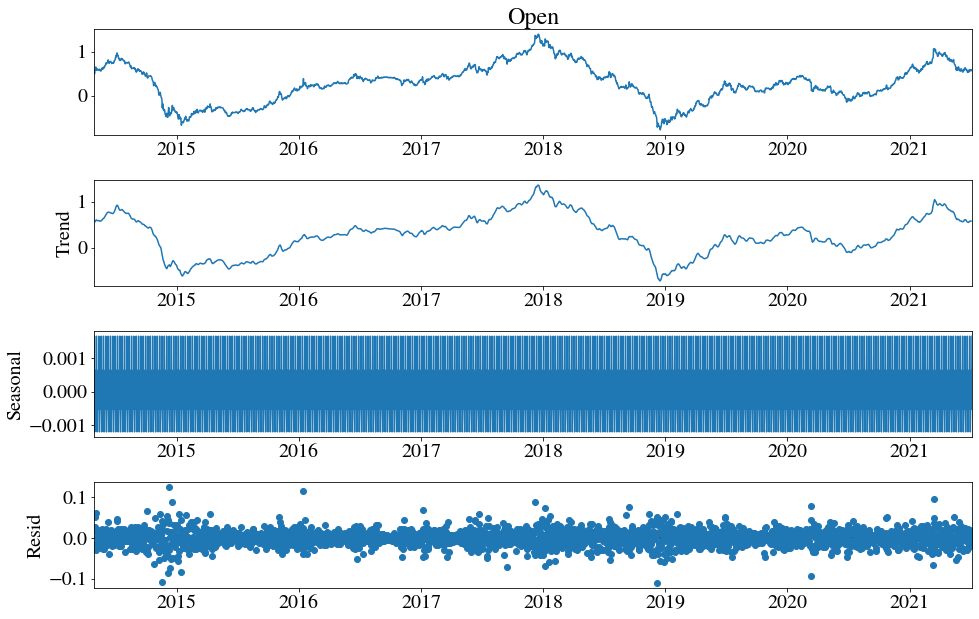

<Figure size 1008x648 with 0 Axes>

In [62]:
plt.rcParams['figure.figsize'] = (14, 9)

s_dec_additive = seasonal_decompose(bitcoinLog10_diff, model = "additive")
s_dec_additive.plot()
plt.show()
plt.savefig("seasonal_decompose_bitcoint_Log10_diff.jpg", bbox_inches='tight')

Apartir de estas transformación evidenciamos una mejora en la tendencia y un suavizado en la serie de tiempo, donde se puede evidenciar una posible estacionalidad, por lo tanto aplicaremos de nuevo la prueba de Dickey-Fuller

In [39]:
sts.adfuller(bitcoinLog10_diff)

(-1.9205848218251766,
 0.32244018062251445,
 23,
 2602,
 {'1%': -3.43286566599684,
  '10%': -2.5673616524036085,
  '5%': -2.862651427026831},
 -11736.308482463066)

Al aplicar nuevamente la prueba, notamos que aún el valor estadística es mayor que el esperado y por tal motivo se tomaría nuevamente la hipotesis nulas: Que la serie es no estacionaria. Se aplicará la primera derivada para buscar que la tendencia se aplane un poco

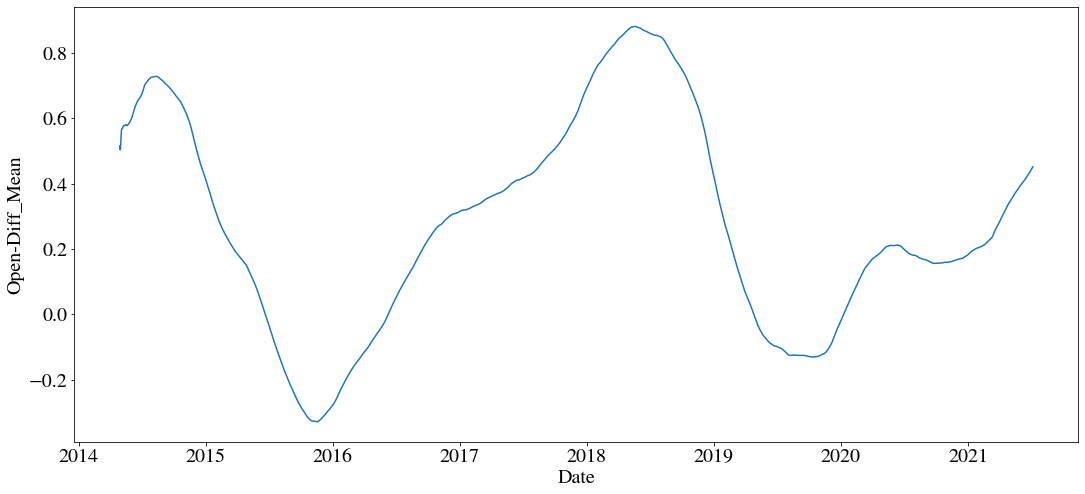

In [63]:
bitcoinOpen_diff_mean = bitcoinLog10_diff.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(18,8))
plt.plot(bitcoinOpen_diff_mean.index,bitcoinOpen_diff_mean.values)
plt.xlabel('Date')
plt.ylabel('Open-Diff_Mean')
plt.show()

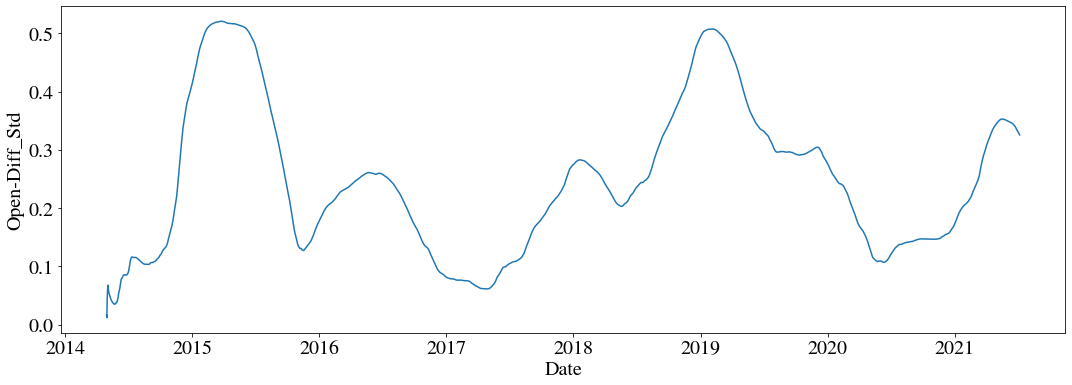

In [64]:
bitcoinOpen_diff_std = bitcoinLog10_diff.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(18,6))
plt.plot(bitcoinOpen_diff_std.index,bitcoinOpen_diff_std.values)
plt.xlabel('Date')
plt.ylabel('Open-Diff_Std')
plt.show()

In [65]:
bitcoinOpen_ajustado_diff = pd.Series(np.diff(bitcoinLog10_diff))

In [66]:
sts.adfuller(bitcoinOpen_ajustado_diff)

(-9.589057764950228,
 2.0594469710749012e-16,
 22,
 2602,
 {'1%': -3.43286566599684,
  '10%': -2.5673616524036085,
  '5%': -2.862651427026831},
 -11728.958348137256)

finalmente al realizar la derivada notamos que los valores para el valor estadístico y el valor p-value son los esperados para tomar nuestra hipótesis alternativa: La serie es estacionaria
- Valor estadístico -9.54874964334232 <  -2.8626565794277754
- Valor-p 2.60614938365808e-16 < 0.05

Ahora aplicaremos la media móvil a los datos que tenemos para mirar su comportamiento

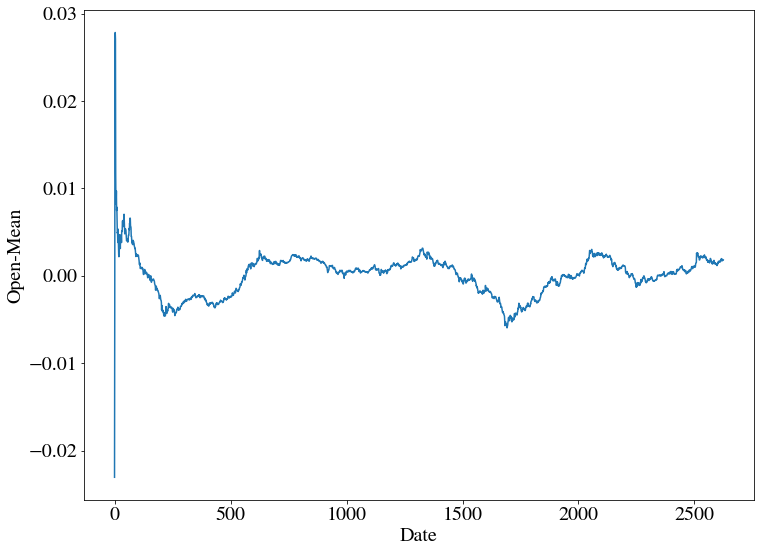

<Figure size 1008x648 with 0 Axes>

In [67]:
bitcoinOpen_ajustado_mean = bitcoinOpen_ajustado_diff.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinOpen_ajustado_mean.index,bitcoinOpen_ajustado_mean.values)
plt.xlabel('Date')
plt.ylabel('Open-Mean')
plt.show()
plt.savefig("bitcoinOpen_ajustado_diff_media.jpg", bbox_inches='tight')

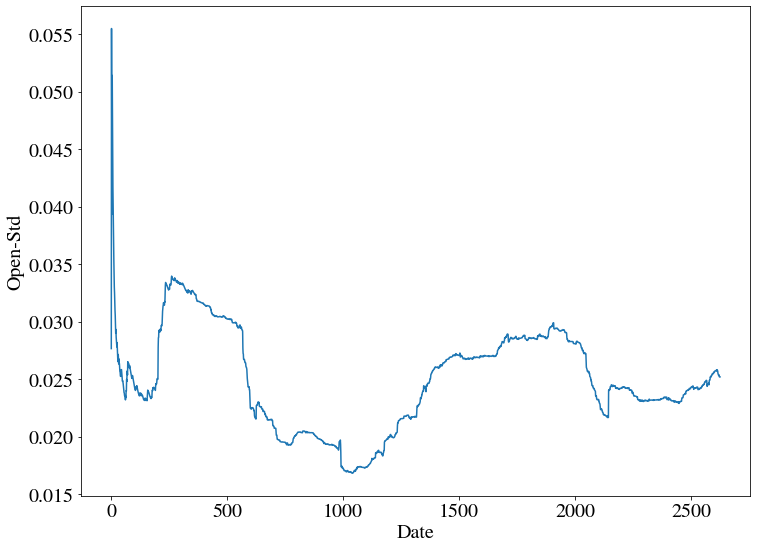

<Figure size 1008x648 with 0 Axes>

In [68]:
bitcoinOpen_ajustado_std = bitcoinOpen_ajustado_diff.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinOpen_ajustado_std.index,bitcoinOpen_ajustado_std.values)
plt.xlabel('Date')
plt.ylabel('Open-Std')
plt.show()
plt.savefig("bitcoinOpen_ajustado_diff_Std.jpg", bbox_inches='tight')

aplicamos la ténica de normalización de los datos, por medio del método de MinMax, con el objetivo de evitar datos que queden muy dispersos entre sí y genere sesgos en el análisis

In [69]:
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
bitcoinOpen_Norm = MinMax_1.fit_transform(bitcoinOpen_ajustado_diff.values.reshape(-1,1)) # Transformación de los nuevos datos con una escala MinMax
bitcoinOpen_Norm = pd.DataFrame(data = bitcoinOpen_Norm, columns = ['Open'], index = bitcoinOpen_ajustado_diff.index )

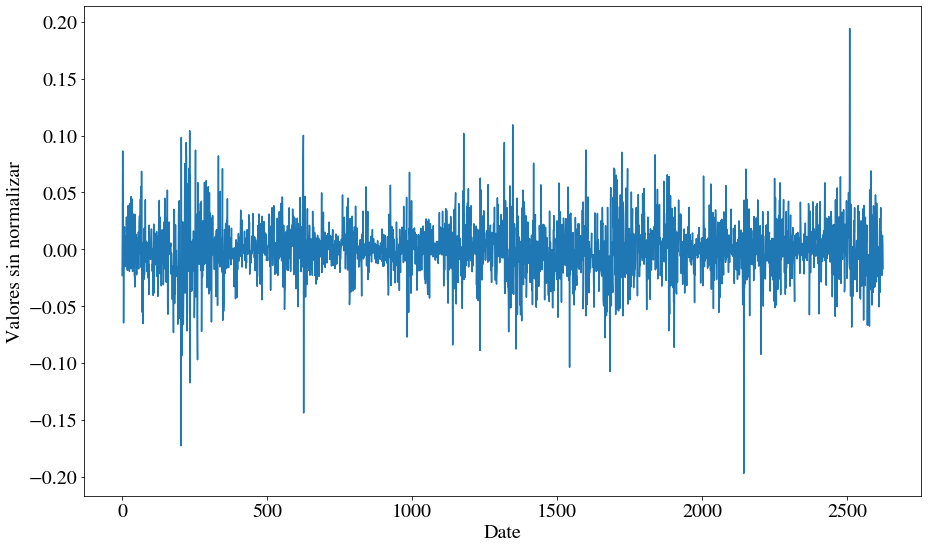

<Figure size 1008x648 with 0 Axes>

In [70]:
fig = plt.figure(figsize=(15,9))
plt.plot(bitcoinOpen_ajustado_diff.index, bitcoinOpen_ajustado_diff.values)
plt.xlabel('Date')
plt.ylabel('Valores sin normalizar')
plt.show()
plt.savefig("bitcoinOpen_ajustado_Sin_Normalizar.jpg", bbox_inches='tight')

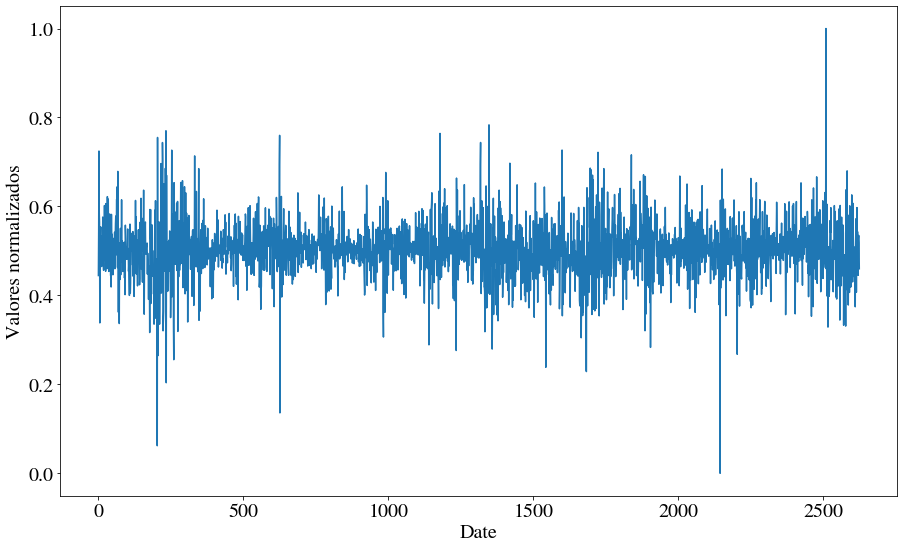

<Figure size 1008x648 with 0 Axes>

In [71]:
fig = plt.figure(figsize=(15,9))
plt.plot(bitcoinOpen_Norm.index, bitcoinOpen_Norm.values)
plt.xlabel('Date')
plt.ylabel('Valores normalizados')
plt.show()
plt.savefig("bitcoinOpen_ajustado_Normalizados.jpg", bbox_inches='tight')

Luego de esto se identifica que la normalización no aporta ningún valor adicional y se seguirá trabajando con los datos anteriores

# **Función AutoArima**

**Se aplica la función de AutoArima**

Para este caso se toma el dataframe df_coins_open que anteriormente se había calculado, desde el cual se tomarán los valores de los otros campos para considerarlos como variables exógenas, las cuales son usadas como valores de referencia que afectarían el comportamiento de nuestra variable objetivo.

Usamos como varaibles exógenas el valor de apertura de las otras criptomonedas

In [47]:
df_Coins_open_copy = df_Coins_open.copy()

In [48]:
for nombres in df_Coins_open_copy.columns:
  df_Coins_open_copy[nombres] = df_Coins_open_copy[nombres].apply(lambda x: np.log10(x))

Para este caso no se calcula el diff(365) ya que el modelo de autoArima no funciona muy bien con esta transformación, por tal motivo se calcula un porcentaje de cambio de dos valores consecutivos para tener el cuenta el crecimiento o decrecimiento de los precios de la monedas, por tal motivo tomamos como parametro de entrada pct(1) para tener un día de retraso, y la tasa de cambio que retorna, se multiplica por 100 para obtener el porcentaje real.

In [49]:
df_Coins_open_copy['ret_bitcoinOpen'] = df_Coins_open_copy.bitcoinOpen.pct_change(1).mul(100).values
df_Coins_open_copy['ret_binanceOpen'] = df_Coins_open_copy.binanceOpen.pct_change(1).mul(100).values
df_Coins_open_copy['ret_cardanoOpen'] = df_Coins_open_copy.cardanoOpen.pct_change(1).mul(100).values
df_Coins_open_copy['ret_ethereumOpen'] = df_Coins_open_copy.ethereumOpen.pct_change(1).mul(100).values
df_Coins_open_copy['ret_tetherOpen'] = df_Coins_open_copy.tetherOpen.pct_change(1).mul(100).values

df_Coins_open_copy=df_Coins_open_copy.fillna(method='ffill')

In [50]:
df_Coins_open_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 2017-10-02 to 2021-07-06
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bitcoinOpen       1374 non-null   float64
 1   binanceOpen       1374 non-null   float64
 2   cardanoOpen       1374 non-null   float64
 3   ethereumOpen      1374 non-null   float64
 4   tetherOpen        1374 non-null   float64
 5   ret_bitcoinOpen   1373 non-null   float64
 6   ret_binanceOpen   1373 non-null   float64
 7   ret_cardanoOpen   1373 non-null   float64
 8   ret_ethereumOpen  1373 non-null   float64
 9   ret_tetherOpen    1373 non-null   float64
dtypes: float64(10)
memory usage: 150.4+ KB


In [51]:
df_Coins_open_copy.head()

,bitcoinOpen,binanceOpen,cardanoOpen,ethereumOpen,tetherOpen,ret_bitcoinOpen,ret_binanceOpen,ret_cardanoOpen,ret_ethereumOpen,ret_tetherOpen
Date,,,,,,,,,,
2017-10-02,3.643039,0.183731,-1.608941,2.480700,-0.000831,NaN,NaN,NaN,NaN,NaN
2017-10-03,3.644287,0.293988,-1.589111,2.473462,0.000816,0.034257,60.009816,-1.232477,-0.291747,-198.142813
2017-10-04,3.635420,0.267524,-1.680600,2.466503,0.000829,-0.243298,-9.001687,5.757235,-0.281359,1.590011
2017-10-05,3.626328,0.213515,-1.658540,2.466531,0.000117,-0.250105,-20.188351,-1.312661,0.001143,-85.851602
2017-10-06,3.635932,0.224613,-1.670421,2.470050,0.000182,0.264837,5.197871,0.716374,0.142674,55.529180


In [52]:
model_auto2 = auto_arima(df_Coins_open_copy['ret_bitcoinOpen'][1:], exogenous = df_Coins_open_copy[['ret_binanceOpen', 'ret_cardanoOpen','ret_ethereumOpen','ret_tetherOpen']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 1, max_P = 4, max_Q = 4, max_D = 1,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample_size = int(len(df_Coins_open_copy)*0.2))

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


In [53]:
size = int(len(df_Coins_open_copy)*0.8)
df, df_test = df_Coins_open_copy.iloc[:size], df_Coins_open_copy.iloc[size:]

start_date = "2020-10-05"
end_date = "2021-07-06"

df_auto_pred = pd.DataFrame(model_auto2.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_binanceOpen', 'ret_cardanoOpen','ret_ethereumOpen','ret_tetherOpen']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

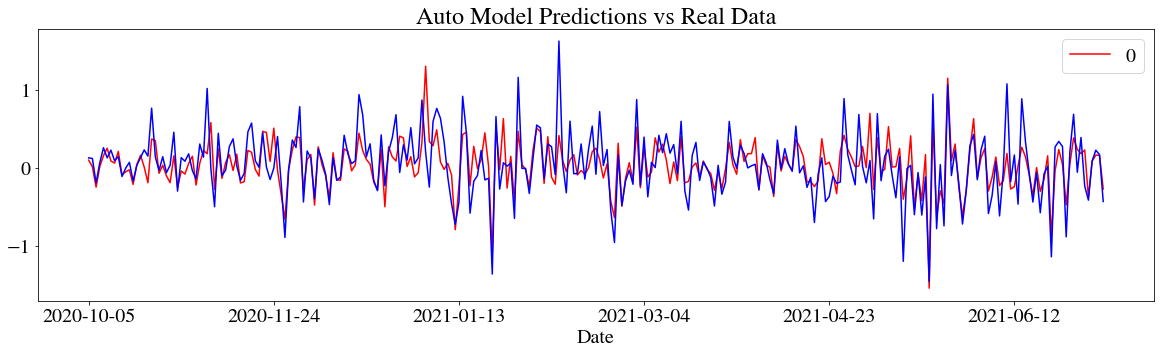

<Figure size 1008x648 with 0 Axes>

In [54]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_Coins_open_copy['ret_bitcoinOpen'][start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()
plt.savefig("Modelo_AutoArima_Vs_Real.jpg", bbox_inches='tight')

In [55]:
model_auto2

ARIMA(order=(2, 0, 2), out_of_sample_size=274, scoring_args={},
      seasonal_order=(1, 0, 0, 5), suppress_warnings=True, trend='ct')

In [56]:
model_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1373
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 5)   Log Likelihood                -253.526
Date:                            Sun, 15 May 2022   AIC                            531.053
Time:                                    18:32:51   BIC                            593.750
Sample:                                         0   HQIC                           554.513
                                           - 1373                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0181      0.032      0.561      0.575      -0.045       0.081
drift      -2.015e-05   4.11e-05     -0.490      0.624      -0.000    6.04e-05
x1             0.0064      0.001      7.671      0.000       0.005       0.008
x2         -4.128e-05   4.73e-05     -0.873      0.383      -0.000    5.14e-05
x3             0.3714      0.005     69.709      0.000       0.361       0.382
x4         -8.673e-06   3.09e-06     -2.806      0.005   -1.47e-05   -2.61e-06
ar.L1         -0.7543      1.316     -0.573      0.566      -3.333       1.824
ar.L2         -0.0457      0.443     -0.103      0.918      -0.914       0.823
ma.L1          0.8563      1.316      0.650      0.515      -1.724       3.436
ma.L2          0.1018      0.568      0.179      0.858      -1.011       1.214
ar.S.L5        0.0234      0.022      1.085      0.278      -0.019       0.066
sigma2         0.0855      0.002     51.659      0.000       0.082       0.089
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):              3039.63
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo que tenemos como resultado de la función AutoArima tiene las siguientes componentes:
SARIMAX(2, 0, 2)x(1, 0, [], 5):
donde podemos describir que el resultado es un modelo ARIMA estacional, con una frecuencia de cinco días. con una tendencia autoregresiva de 2.